In [1]:
import random
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def gen_random_number(n):
    """
    returns: random integer in the range [1-n]
    """
    return random.randint(1, n)

In [3]:
def gen_random_chromosome_values(n):
    """
    Generates a new chromosome in Uniform Distribution. (a, b, c)
    N: number of values to generate. 
    Used for mutation purpose where we need to replace only a single value in the chromosome
    """
    return np.random.uniform(-10,10,n)

In [4]:
def initialise_population(N):
    """
    N: initial size of population
    Return the whole initial generation of population.
    """
    print("\nGenerating Initial Population")
    initial_population = []
    for count in range(N):
        initial_population.append(gen_random_chromosome_values(3))
    return np.array(initial_population)

In [5]:
def perform_crossover(p, q):
    """
    p, q: chromosomes
    """
    previous_crossover = -1
    num_times = gen_random_number(2)
    p1, p2 = 0, 0
    
    # to randomly select the number of times to perform the cross over. either 1 or 2.
    for i in range(num_times):
        cross_point = gen_random_number(3) - 1

        # if the random value (num_times) gives 2, we will be performing the crossover twice on the same chromosomes
        # and if the same crossover point is selected in both the iterations, then the function will return the same chromosomes
        # to avoid that condition, we return in this if condition.
        if num_times == 2:
            if previous_crossover == cross_point:
                return p1, p2

        p1 = np.zeros(3)
        p2 = np.zeros(3)

        p1[:cross_point] = q[:cross_point]
        p1[cross_point:] = p[cross_point:]

        p2[:cross_point] = p[:cross_point]
        p2[cross_point:] = q[cross_point:]
        previous_crossover = cross_point
    return p1, p2

In [6]:
def perform_crossover_intermediate(p, q):
    """
    p, q: chromosomes
    """
    return (p + q)/2

In [7]:
def crossover(population):
    """
    This performs the cross over of all the population
    """
    print("Performing Crossover")
    
    # for Mu + Lambda, we should take parents also. else we should take only the children.
    if Mu_plus_lambda:
        children_population = copy.deepcopy(population)
    else:
        children_population = []
    temp = copy.deepcopy(population)
    for p in range(len(temp)):
        for q in range(len(temp)):
            if p != q:
                if discrete_crossover:
                    p1, p2 = perform_crossover(temp[p], temp[q])
                    children_population.append(p1)
                    children_population.append(p2)
                else:
                    p3 = perform_crossover_intermediate(temp[p], temp[q])
                    children_population.append(p3)
    return children_population

In [8]:
def perform_mutate(chromosome):
    """
    Performs mutation on a single chromosome
    The random choice is to randomly select if we want to do mutation once or twice on a single chromosome in a probabilistic manner
    """
    c = copy.deepcopy(chromosome)
    for p in range(random.choice([1, 1, 1, 1, 1, 2, 2])):
        mutate_location = gen_random_number(3) - 1
        c[mutate_location] = gen_random_chromosome_values(1)[0]
    return c

In [9]:
def mutate(population):
    print("Performing Mutation")
    mutated_population = []
    for chromosome in population:
        mutated_population.append(perform_mutate(chromosome))
    return mutated_population

In [10]:
def calculate_mse(chromosome):
    a, b, c = chromosome
    loss = 0
    for i, o in data.values:
        o_pred = a * (i**2 - b * np.cos(c*22/7*i))
        loss += (o - o_pred)**2
    return loss/data.shape[0]

In [11]:
def evaluation_function(population, top):
    """
    Calculates MSE on all chromosomes for the given data files.
    """
    temp = []
    for i in population:
        collisions = calculate_mse(i)
        temp.append([collisions, i])
    temp.sort(key=lambda x: x[0])
    return [row[1] for row in temp[:top]]


Generating Initial Population

-------------- Generation 1 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 2 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 3 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 4 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 5 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 6 --------------
Current MSE:  67.07891755786471 Fitness: 0.01468883519115936
Performing Mutation

Generating Initial Population

-------------- Generation 7 ----


-------------- Generation 54 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 55 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 56 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 57 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 58 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 59 --------------
Current MSE:  49.6382714477736 Fitness: 0.019747909464709165
Performing Mutation

Generating Initial Population

-------------- Generation 60 --------------
Current MSE: 

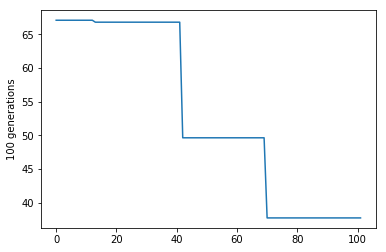

In [12]:
data = pd.read_csv("model22.txt", sep=" ", header=None)

Mu=30
N = 100
gamma = 90
question1 = True
Mu_plus_lambda = False
# only for Q2. No crossover in Q1
discrete_crossover = False

"""
For question 1, we should not use crossover, so we will be taking the whole population as the shortlisted population
"""
if question1:
    mu = N

initialPopulation = initialise_population(N)
bestPopulation = evaluation_function(initialPopulation, Mu)
bestChromosome = bestPopulation[0]
current_best_performing = calculate_mse(bestChromosome)

dump = []
dump.append(current_best_performing)

generation = 0

# converging condition is MSE <= 1
while current_best_performing > 1 and generation < 100:
    generation = generation + 1
    print("\n-------------- Generation", generation, "--------------")
    print("Current MSE: ", current_best_performing, "Fitness:", 1 / (1 + current_best_performing))
    
    if not question1:
        new_pop = crossover(bestPopulation)
    else:
        new_pop = copy.deepcopy(bestPopulation)
    new_pop = mutate(new_pop)
    
    if question1:
        new_pop += [np.array(i) for i in initialise_population(N)]

    bestPopulation = evaluation_function(new_pop, Mu)
    
    bestChromosomeN = bestPopulation[0]

    generated_best_performing = calculate_mse(bestChromosomeN)

    dump.append(current_best_performing)

    if current_best_performing > generated_best_performing:
        bestChromosome = bestPopulation[0]
        current_best_performing = generated_best_performing
        print(bestChromosome)


print("\n-------------- Generation", generation, "--------------")
print("Current MSE: ", current_best_performing, "Fitness:", 1 / (1 + current_best_performing))
print("\nConverged in", generation, "generation", "\nTimetable")

print("a, b, c: ", bestChromosome)
dump.append(calculate_mse(bestChromosome))
plt.plot(dump)
plt.ylabel(str(generation) + " generations")
plt.show()